# Spatial Autocorrelation
<img src="images/spatial_auto.png" width=700 />

Autocorrelation is a measure of similarity (correlation) between nearby observations.

**The first law of geography**: Everything is related to everything else, but near things are more related than distant things.” Waldo R. Tobler (Tobler 1970)

The idea is to investigate whether or not spatial objects with similar values are clustered, randomly distributed or dispersed. But why is autocorrellation important? Statistics relies on observations being independent from one another. If autocorrelation exists in a time or space, then this violates the fact that observations are independent from one another. On the other hand, it also implies that there could be something interesting regarding die data distribution, which may be interesting to investigate.

## Spatial Autocorrelation

Spatial autocorrelation is simply to understand the degree to which one object is similar to other nearby objects and is an is an extension of temporal autocorrelation.  

The idea is that where adjacent observations have similar data values the map shows positive spatial autocorrelation. Where adjacent observations tend to have very contrasting values then the map shows negative spatial autocorrelation. There are several statistical techniques for detecting its presence. 

In contrast to temporal autocorrelation, which only has one dimension, spatial autocorrellation is a little bit more complicated, because it has at least two dimensions. 

The presence of spatial autocorrelation is interresting for spatial analysis, because it can help us for example to investigate and understand association between different features in our data (e.g. Land cover and land surface, health care and survival ...). Also the presence of spatial autocorrelation implies information redundancy and also has important implications for the methodology of spatial data analysis. 

<img src="images/correlation.png" width=500 />

In [2]:
from libpysal.weights import lat2W, lag_spatial
from spreg import OLS
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv

In [3]:
def draw_map(lamb):
    s = 20
    n = s**2
    w = lat2W(s, s, rook=False)
    w.transform = 'R'
    e = np.random.random((n, 1))
    u = inv(np.eye(n) - lamb * w.full()[0])
    u = np.dot(u, e)
    ul = lag_spatial(w, u)
    u = (u - u.mean()) / np.std(u)
    ul = (ul - ul.mean()) / np.std(ul)
    gu = u.reshape((s, s))
    # Figure
    f = plt.figure(figsize=(9, 4))
    ax1 = f.add_subplot(121)
    ax1.matshow(gu, cmap=plt.cm.YlGn)
    ax1.set_frame_on(False)
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    #---
    ax2 = f.add_subplot(122)
    sc = ax2.scatter(u, ul, linewidth=0)
    ols = OLS(ul, u)
    tag = "b = %.3f"%ols.betas[1][0]
    ax2.plot(u, ols.predy, c='red', label=tag)
    ax2.axvline(0, c='0.5')
    ax2.axhline(0, c='0.5')
    ax2.legend()
    plt.xlabel('u')
    plt.ylabel('Wu')
    plt.suptitle("$\lambda$ = %.2f"%lamb)
    plt.show()

In [4]:
%matplotlib inline

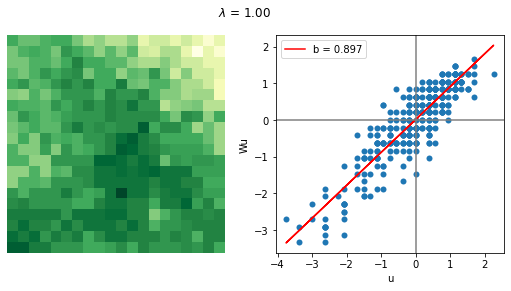

In [13]:
draw_map(1)

Let’s say we are interested in spatial autocorrelation of the Plasmodium falciparum parasite rate (PfPR)  in the different departments of Burkina Faso. If there were spatial autocorrelation, regions of a similar PfPR would be spatially clustered.

In [14]:
import geopandas as gpd

In [15]:
bfa = gpd.read_file('Data/vector/burkina/bfa.shp')
bfa

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,CCN_3,...,VARNAME_3,population,mean_temp,_popcount,_popsum,_popmean,_pfprcount,_pfprsum,_pfprmean,geometry
0,38,BFA,Burkina Faso,1,Boucle du Mouhoun,1,Balé,1,Bagassi,0,...,None,43643.446897,27.9866,76102.0,42809.103552,0.562523,28.0,10.029830,0.358208,"POLYGON ((-3.36566 11.69085, -3.36607 11.69186..."
1,38,BFA,Burkina Faso,1,Boucle du Mouhoun,1,Balé,2,Bana,0,...,None,18722.667668,27.7458,18088.0,18241.097700,1.008464,8.0,3.052409,0.381551,"POLYGON ((-3.36400 11.96854, -3.36379 11.96775..."
2,38,BFA,Burkina Faso,1,Boucle du Mouhoun,1,Balé,3,Boromo,0,...,None,33141.420605,27.9308,114682.0,32894.777334,0.286835,46.0,17.597431,0.382553,"POLYGON ((-3.09025 11.55295, -3.09016 11.55105..."
3,38,BFA,Burkina Faso,1,Boucle du Mouhoun,1,Balé,4,Fara,0,...,None,55906.843590,27.8686,86747.0,54300.486196,0.625964,35.0,11.408403,0.325954,"POLYGON ((-2.85791 11.24521, -2.86124 11.24446..."
4,38,BFA,Burkina Faso,1,Boucle du Mouhoun,1,Balé,5,Oury,0,...,Ouri,36272.957743,28.0823,79213.0,35497.922441,0.448133,32.0,12.970542,0.405329,"POLYGON ((-3.14343 11.81859, -3.14444 11.81989..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,38,BFA,Burkina Faso,13,Sud-Ouest,45,Poni,347,Kampti,0,...,None,73081.130700,27.3181,159420.0,70462.795281,0.441995,63.0,30.441442,0.483197,"POLYGON ((-3.24994 10.12521, -3.24867 10.12304..."
347,38,BFA,Burkina Faso,13,Sud-Ouest,45,Poni,348,Loropeni,0,...,None,79048.796619,27.3819,244844.0,75953.962628,0.310214,100.0,44.091832,0.440918,"POLYGON ((-3.70369 10.65122, -3.69618 10.65295..."
348,38,BFA,Burkina Faso,13,Sud-Ouest,45,Poni,349,Malba,0,...,None,13009.862483,27.7820,21226.0,12887.606640,0.607161,9.0,3.354168,0.372685,"POLYGON ((-2.91947 10.45801, -2.91960 10.45631..."
349,38,BFA,Burkina Faso,13,Sud-Ouest,45,Poni,350,Nako,0,...,None,29167.810596,27.7449,81082.0,29076.506498,0.358606,33.0,13.027540,0.394774,"POLYGON ((-3.03654 10.52400, -3.03761 10.52362..."


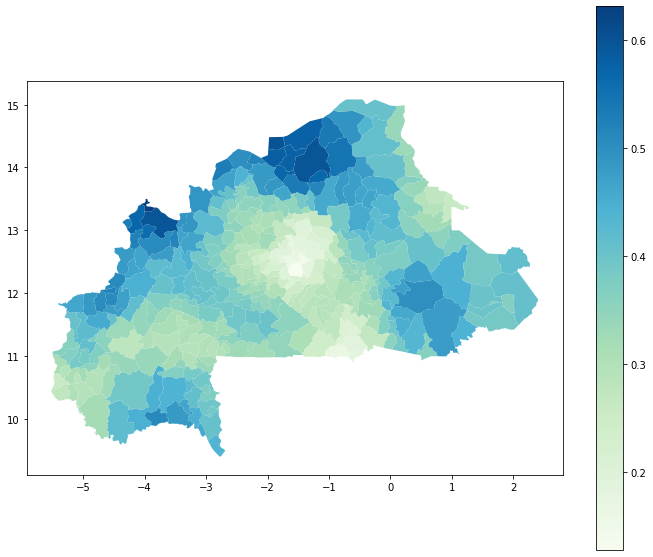

In [49]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
bfa.plot(column='_pfprmean',  k=5, cmap='GnBu', legend=True, ax=ax)

## Spatial weights

Spatial weights are mathematical structures used to represent spatial relationships.

A spatial weight $w_{i,j}$ expresses the notion of a geographical relationship between locations $i$ and $j$. 

These relationships can be based on a number of criteria including contiguity, geospatial distance and general distances.

**Contigutiy weights**

These weights are symmetric, in that when polygon $A$ neighbors polygon $B$, both $w{AB} = 1$ and $w{BA} = 1$.

<img src="images/rook_queen.png" />

- **rook criterion**: spatial units are neighbors when they share a common edge 
- **queen criterion**: defines neighbors as spatial units sharing at least a common vertex

In [16]:
import libpysal as lps
gdf = bfa
wq =  lps.weights.Queen.from_dataframe(gdf)
wq

To get the neighbors & weights around an observation, use the observation's index on the weights object, like a dictionary:

In [17]:
wq[4]

{0: 1.0, 32: 1.0, 2: 1.0, 145: 1.0, 6: 1.0, 8: 1.0, 31: 1.0}

In [18]:
self_and_neighbors = [4]
self_and_neighbors.extend(wq.neighbors[4])
print(self_and_neighbors)

[4, 0, 32, 2, 145, 6, 8, 31]


In [19]:
neigbours = gdf.loc[self_and_neighbors][1:]
neigbours

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,ID_3,NAME_3,CCN_3,...,VARNAME_3,population,mean_temp,_popcount,_popsum,_popmean,_pfprcount,_pfprsum,_pfprmean,geometry
0,38,BFA,Burkina Faso,1,Boucle du Mouhoun,1,Balé,1,Bagassi,0,...,None,43643.446897,27.9866,76102.0,42809.103552,0.562523,28.0,10.029830,0.358208,"POLYGON ((-3.36566 11.69085, -3.36607 11.69186..."
32,38,BFA,Burkina Faso,1,Boucle du Mouhoun,4,Mouhoun,33,Tchériba,0,...,Tcheriba,50028.096351,28.4265,156503.0,49209.211476,0.314430,65.0,26.283318,0.404359,"POLYGON ((-3.07033 12.10294, -3.07071 12.10799..."
2,38,BFA,Burkina Faso,1,Boucle du Mouhoun,1,Balé,3,Boromo,0,...,None,33141.420605,27.9308,114682.0,32894.777334,0.286835,46.0,17.597431,0.382553,"POLYGON ((-3.09025 11.55295, -3.09016 11.55105..."
145,38,BFA,Burkina Faso,5,Centre-Ouest,16,Sanguié,146,Zamo,0,...,None,19314.920808,28.1462,79038.0,19017.910471,0.240617,32.0,12.730202,0.397819,"POLYGON ((-2.62278 12.07008, -2.62030 12.06421..."
6,38,BFA,Burkina Faso,1,Boucle du Mouhoun,1,Balé,7,Pompoï,0,...,None,15774.165983,27.8888,27376.0,15376.278157,0.561670,11.0,4.181362,0.380124,"POLYGON ((-3.14343 11.81859, -3.15653 11.81363..."
8,38,BFA,Burkina Faso,1,Boucle du Mouhoun,1,Balé,9,Siby,0,...,None,23067.840244,28.0311,32809.0,22264.090108,0.678597,12.0,4.726345,0.393862,"POLYGON ((-2.82908 11.86452, -2.83113 11.86234..."
31,38,BFA,Burkina Faso,1,Boucle du Mouhoun,4,Mouhoun,32,Safane,0,...,None,69348.322019,28.1811,117564.0,67640.350171,0.575349,47.0,19.349019,0.411681,"POLYGON ((-3.36400 11.96854, -3.36543 11.96960..."


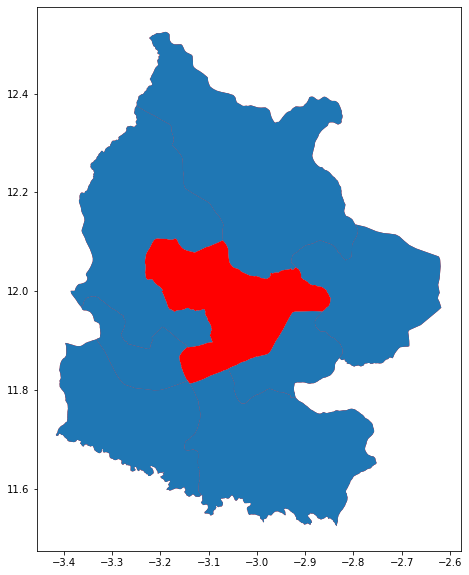

In [13]:
fig, ax = plt.subplots(figsize = (10,10)) 
gdf.loc[self_and_neighbors].plot(color='red',ax=ax)
neigbours.plot(ax=ax)

/home/sth02bh/.local/lib/python3.8/site-packages/splot/_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
/home/sth02bh/.local/lib/python3.8/site-packages/splot/_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


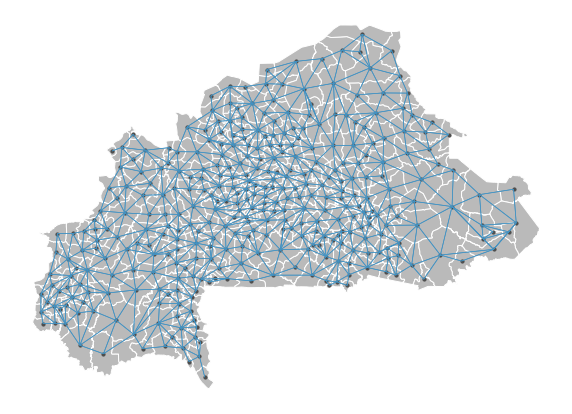

In [20]:
from splot.libpysal import plot_spatial_weights

plot_spatial_weights(wq, gdf)
plt.show()

**Distance**
There are many other kinds of weighting functions in PySAL. Another separate type use a continuous measure of distance to define neighborhoods. 

<ipython-input-21-7ac842a469fb>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroidseries = gdf['geometry'].centroid


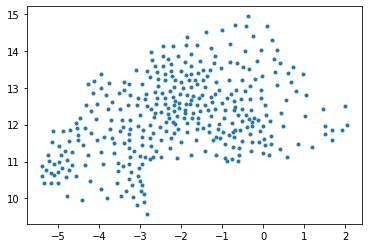

In [21]:
def getXY(pt):
    return (pt.x, pt.y)
centroidseries = gdf['geometry'].centroid
x,y = [list(t) for t in zip(*map(getXY, centroidseries))]
plt.plot(x,y,'.')

In [22]:
data=np.column_stack((x, y))
kd = lps.cg.KDTree(data)
wnn2 = lps.weights.KNN(kd, 2)

/home/sth02bh/.local/lib/python3.8/site-packages/splot/_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
/home/sth02bh/.local/lib/python3.8/site-packages/splot/_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


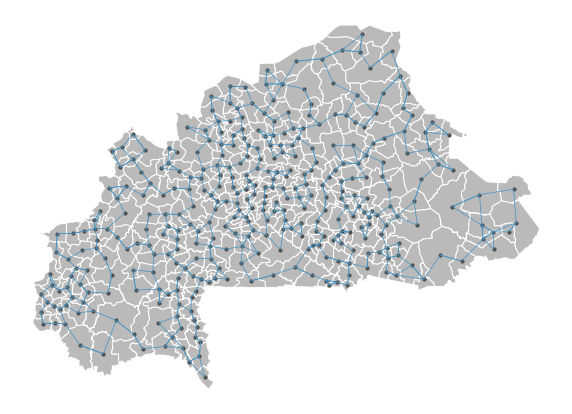

In [17]:
plot_spatial_weights(wnn2, gdf)
plt.show()

**Kernel weights**

Kernel Weights are continuous distance-based weights that use kernel densities to define the neighbor relationship.

/home/sth02bh/.local/lib/python3.8/site-packages/splot/_viz_libpysal_mpl.py:115: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_shp = gdf.centroid.values
/home/sth02bh/.local/lib/python3.8/site-packages/splot/_viz_libpysal_mpl.py:154: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf.centroid.plot(ax=ax, **node_kws)


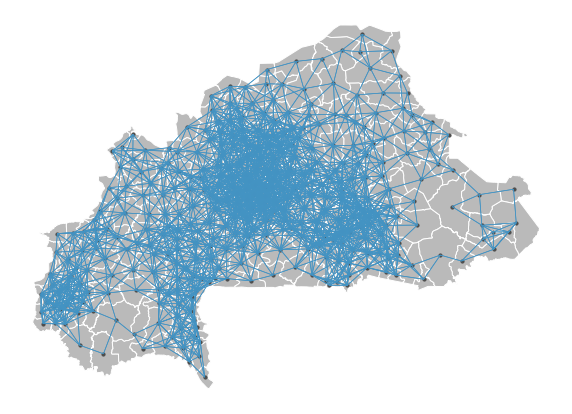

In [18]:
kw=lps.weights.Kernel(data)
plot_spatial_weights(kw, gdf)
plt.show()

**Similarity**

Once we have the data and the spatial weights matrix ready, we can start by computing the spatial lag. 

The spatial weight between different regions indicate if the two regions are neighbors (i.e., geographically similar). But what we also need is a measure of similarity between the attributes we want to investigate. Therefor we will calculate the spatial lag. 

For region $i$ the spatial lag is defined as: $$ylag_i = \sum_j w_{i,j} y_j$$

In [25]:
import mapclassify as mc
df = gdf
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

In [24]:
y = df['_pfprmean']
ylag = lps.weights.lag_spatial(wq, y)

In [26]:
ylagq5 = mc.Quantiles(ylag, k=3)

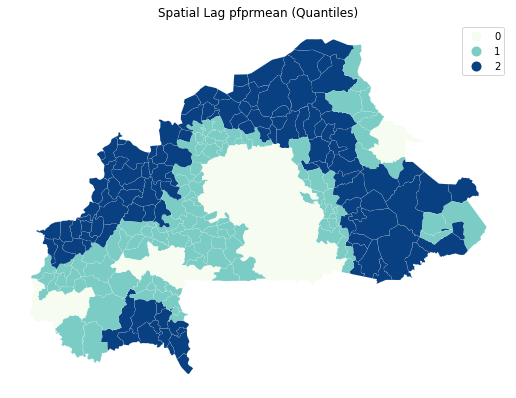

In [30]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag pfprmean (Quantiles)")

plt.show()



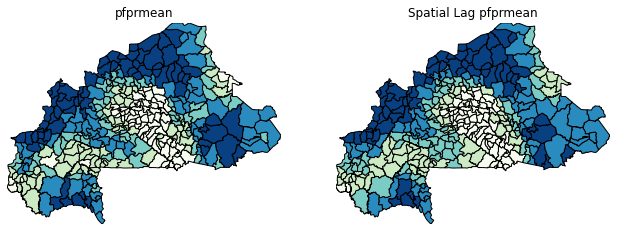

In [31]:
df['lag_pfprmean'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*5,5))
df.plot(column='_pfprmean', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("pfprmean")
df.plot(column='lag_pfprmean', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag pfprmean")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

## Global Spatial Autocorrelation

To complement the geovisualization of these associations we can turn to formal statistical measures of spatial autocorrelation. Let's start simple a think of the problem as a binary case (high and low autocorrelation)

In [32]:
y.median()
yb = y > y.median()
sum(yb)

175

In [33]:
yb = y > y.median()
labels = ["0 Low", "1 High"]
yb = [labels[i] for i in 1*yb] 
df['yb'] = yb

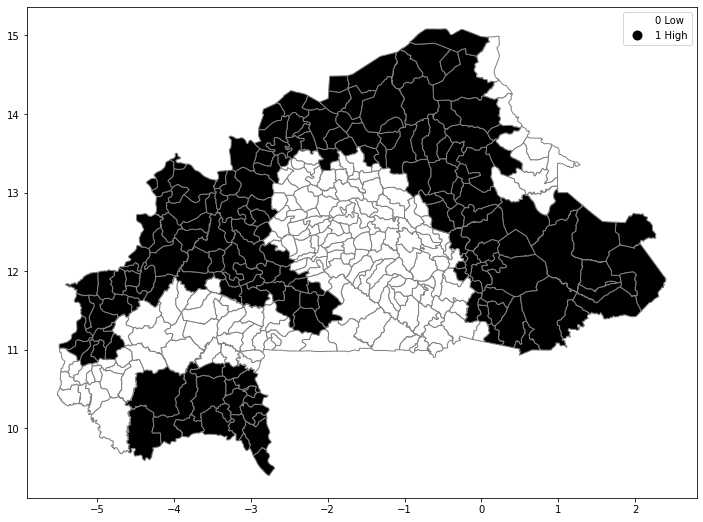

In [28]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

In the next step we can look at so called joint counts. A join exists for each neighbor pair of observations, and the joins are reflected in our binary spatial weights object wq. If we pair each region with it's neigbours we can get three different types of joins for each pairing:

- Low Low (white white)
- High High (black black)
- High Low (black white)

In [34]:
import esda 

yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)



In [37]:
jc.bb
jc.ww
jc.bw

141

But what can we do with this result? What we want to know is, if this pattern show spatial autocorrelation. Therefor we have to answer the question, would we expect the same pattern if the process leading to this pattern would be a completly random one. 

PySAL uses random spatial permutations of the observed attribute values to generate a realization under the null of complete spatial randomness (CSR). This is repeated a large number of times (999 default) to construct a reference distribution to evaluate the statistical significance of our observed counts.

In [38]:
jc.sim_bb

array([235, 227, 244, 253, 213, 244, 252, 245, 233, 252, 243, 231, 251,
       252, 237, 251, 240, 244, 243, 246, 243, 234, 227, 249, 240, 234,
       221, 255, 257, 244, 239, 225, 240, 261, 242, 232, 241, 238, 233,
       231, 248, 248, 247, 225, 237, 254, 246, 237, 267, 245, 222, 254,
       232, 235, 242, 218, 244, 251, 241, 235, 236, 252, 244, 244, 246,
       231, 236, 243, 228, 226, 242, 220, 237, 248, 243, 250, 225, 238,
       245, 261, 231, 220, 240, 219, 248, 232, 228, 236, 266, 221, 207,
       249, 230, 251, 234, 237, 253, 238, 236, 243, 242, 225, 248, 246,
       259, 237, 237, 236, 242, 226, 228, 269, 238, 232, 241, 235, 249,
       241, 254, 250, 253, 218, 248, 231, 208, 220, 226, 251, 251, 255,
       232, 238, 241, 245, 251, 244, 259, 254, 228, 235, 252, 249, 225,
       253, 228, 229, 234, 245, 263, 224, 226, 227, 236, 246, 244, 236,
       270, 233, 244, 247, 258, 230, 233, 264, 248, 256, 224, 263, 243,
       247, 251, 246, 240, 224, 239, 235, 248, 245, 243, 246, 25

In [32]:
jc.mean_bb

241

Text(0.5, 0, 'BB Counts')

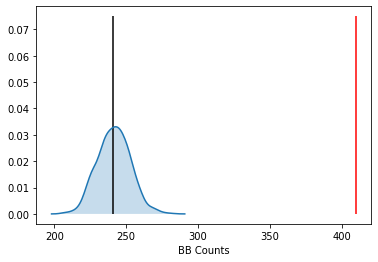

In [33]:
import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.075, color='r')
plt.vlines(jc.mean_bb, 0,0.075)
plt.xlabel('BB Counts')

The density plot shows the distribution of the BB counts, with the black vertical line indicating the mean BB count from the synthetic realizations and the red line the observed BB count. Clearly our observed value is extremely high. Since this is below conventional significance levels, we would reject the null of complete spatial randomness in favor of spatial autocorrelation

### Moran's I

Another way to investigate spatial autocorrellation is Moran's I,  a test for global autocorrelation for a continuous attribute.

$$I = \frac{n}{\sum_{i=1}^n (y_i - \bar{y})^2} \frac{\sum_{i=1}^n \sum_{j=1}^n w_{ij}(y_i - \bar{y})(y_j - \bar{y})}{\sum_{i=1}^n \sum_{j=1}^n w_{ij}}$$

- $n$ = number  of  observations
- $y$ = is the variable of interest
- $\bar{y}$ = the mean value of y
- $w_{ij}$ = the weights

First, we transform our weights to be row-standardized, from the current binary state:

In [39]:
wq.transform = 'r'
y = df['_pfprmean']

In [40]:
from esda.moran import Moran

moran = Moran(y, wq)
moran.I

0.8799958278606206

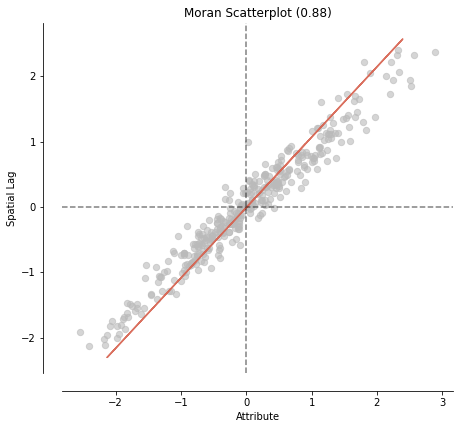

In [41]:
from splot.esda import moran_scatterplot
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

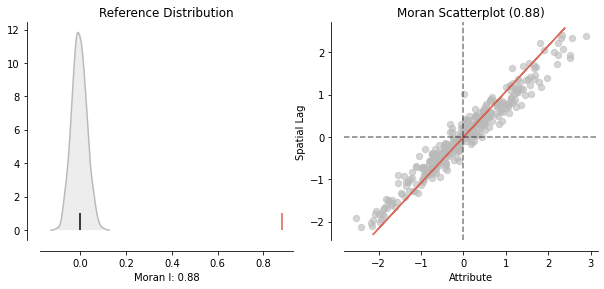

In [42]:
from splot.esda import plot_moran

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()



In [43]:
moran.p_sim

0.001

In [ ]:
y = df['_pfprmean']

### Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers

We can also look at the local autocorrelation, which enables us to detect Hot Spots, Cold Spots, and Spatial Outliers

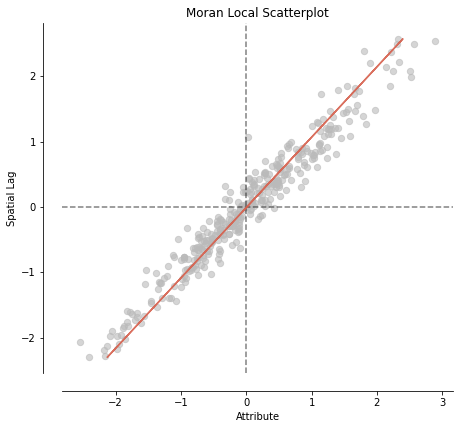

In [44]:
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local

# calculate Moran_Local and plot
moran_loc = Moran_Local(y, wq)
fig, ax = moran_scatterplot(moran_loc)
ax.set_ylabel('Spatial Lag')
plt.show()

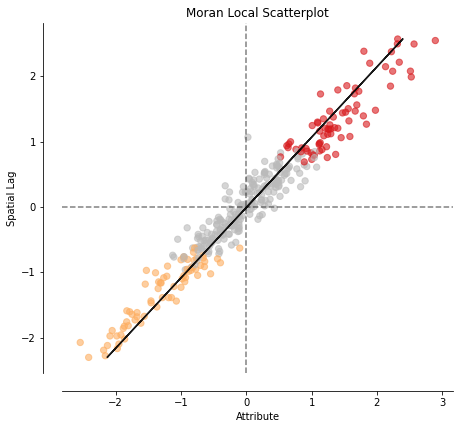

In [45]:
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_ylabel('Spatial Lag')
plt.show()





We can now distinguish between diffrent types of autocorrelation

These types of local spatial autocorrelation describe similarities or dissimilarities between a specific polygon with its neighboring polygons. The upper left quadrant for example indicates that polygons with low values are surrounded by polygons with high values. The lower right quadrant shows polygons with high values surrounded by neighbors with low values. This indicates an association of dissimilar values.

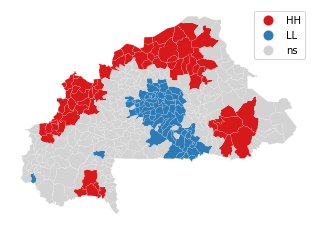

In [46]:
from splot.esda import lisa_cluster

lisa_cluster(moran_loc, gdf, p=0.05)
plt.show()

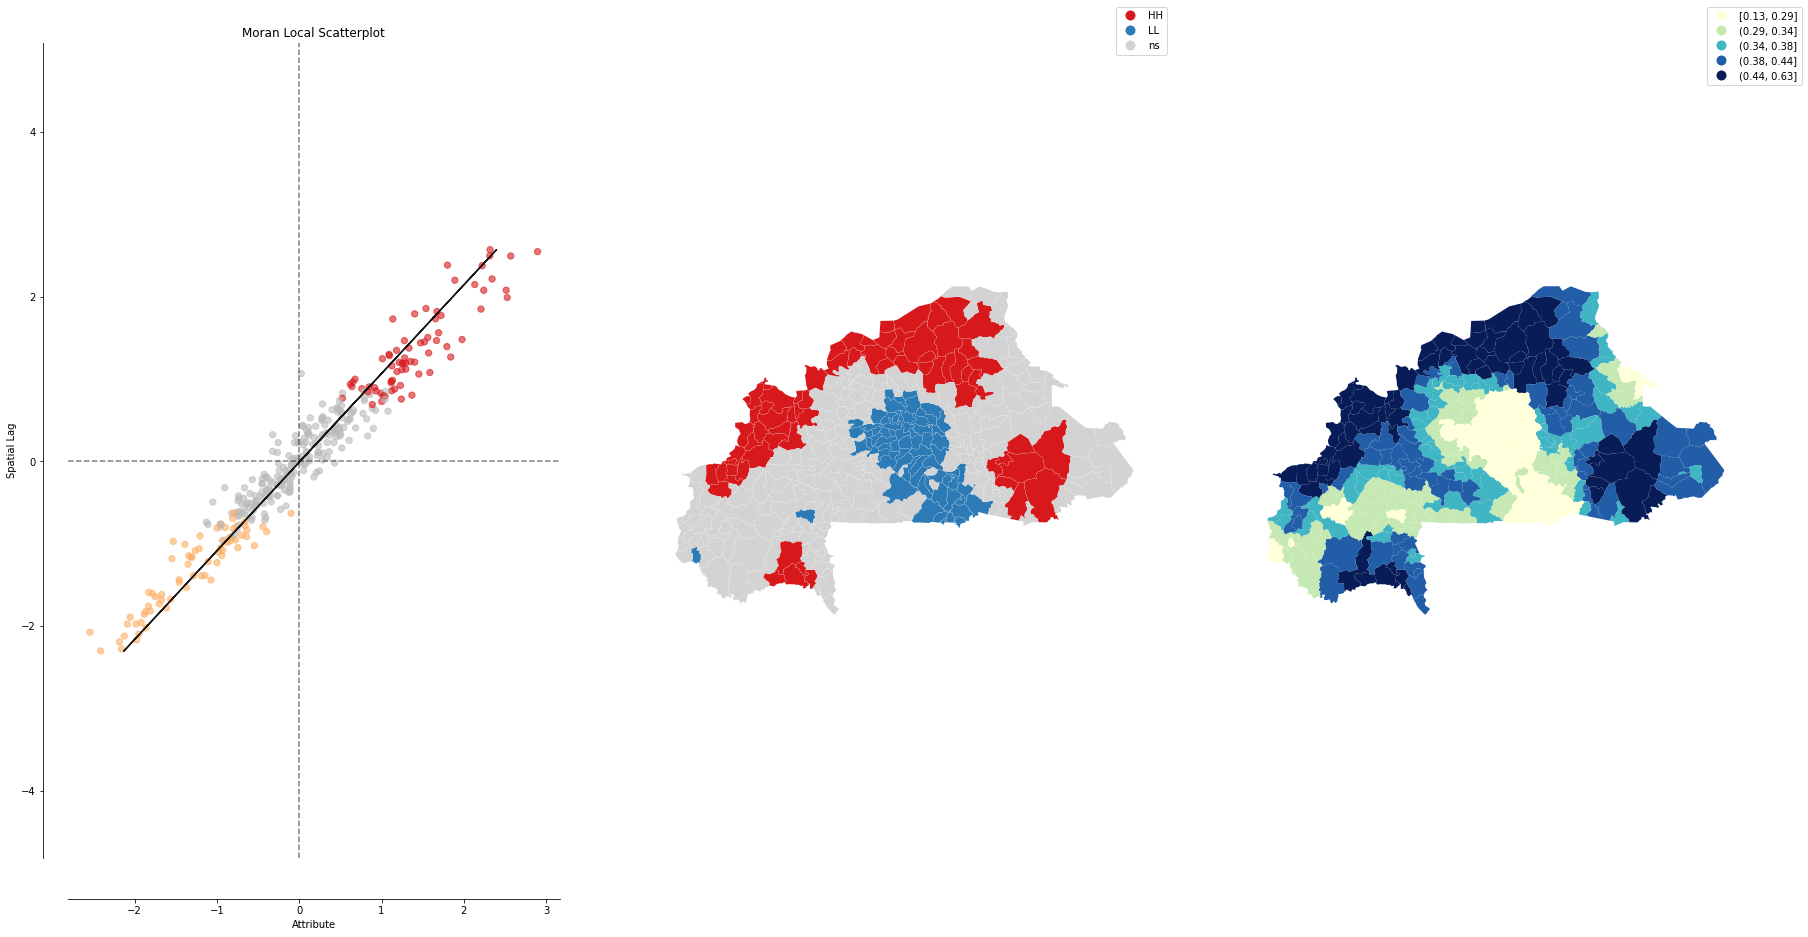

In [47]:
from splot.esda import plot_local_autocorrelation

plot_local_autocorrelation(moran_loc, gdf, '_pfprmean', figsize=(30,15))
plt.show()



# Literature

Bivand, Roger S., et al. Applied spatial data analysis with R. Vol. 747248717. New York: Springer, 2008.

https://geocompr.robinlovelace.net/spatial-class.html

https://pysal.org/libpysal/index.html

https://github.com/pysal/splot/blob/master/notebooks/esda_morans_viz.ipynb

http://darribas.org/gds_scipy16/ipynb_md/04_esda.html

https://github.com/pysal/esda/blob/master/notebooks/Spatial%20Autocorrelation%20for%20Areal%20Unit%20Data.ipynb

https://splot.readthedocs.io/en/stable/users/tutorials/weights.html#distance-band-weights